## AI for Medicine Course 1 Week 1 lecture exercises

# Data Exploration
In the first assignment of this course, you will work with chest x-ray images taken from the public [ChestX-ray8 dataset](https://arxiv.org/abs/1705.02315). In this notebook, you'll get a chance to explore this dataset and familiarize yourself with some of the techniques you'll use in the first graded assignment.

<img src="xray-image.png" alt="U-net Image" width="300" align="middle"/>

The first step before jumping into writing code for any machine learning project is to explore your data. A standard Python package for analyzing and manipulating data is [pandas](https://pandas.pydata.org/docs/#). 

With the next two code cells, you'll import `pandas` and a package called `numpy` for numerical manipulation, then use `pandas` to read a csv file into a dataframe and print out the first few rows of data.

In [0]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
sns.set()

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
case_list = pd.read_csv('/content/drive/My Drive/ML_data/train_val_list.txt')

In [0]:
#this should be a list of all the cases you can use in the train and valid sets
case_list.shape

(86523, 1)

In [0]:
diagnoses = pd.read_csv('/content/drive/My Drive/ML_data/Data_Entry_2017_v2020.csv')

In [0]:
diagnoses.shape

(112120, 11)

In [0]:
diagnoses.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


In [0]:
#need to make new columns with diagnoses in them
#this turns each cell of the labels column into a list of labels
split_dx = [items.split('|') for items in diagnoses['Finding Labels']]

In [0]:
#this gives me a list of classes
flatten =  [item for sublist in split_dx for item in sublist]
classes = set(flatten); classes

{'Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'No Finding',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax'}

In [0]:
#this turns the classes into a dict where each class has a number
class_dict = {finding:i for i,finding in enumerate(classes)}; class_dict

{'Atelectasis': 1,
 'Cardiomegaly': 4,
 'Consolidation': 11,
 'Edema': 9,
 'Effusion': 14,
 'Emphysema': 12,
 'Fibrosis': 0,
 'Hernia': 3,
 'Infiltration': 5,
 'Mass': 6,
 'No Finding': 13,
 'Nodule': 7,
 'Pleural_Thickening': 2,
 'Pneumonia': 10,
 'Pneumothorax': 8}

In [0]:
#this creates a large array containing a 1 in each column where there is a diagnosis (for each xray)
complete_findings = np.empty((len(split_dx), 15))
for idx,findings in enumerate(split_dx):
  findings_array = np.zeros(15)
  for finding in findings:
      findings_array[class_dict[finding]] = 1
  complete_findings[idx,:]= findings_array

In [0]:
#this turns the above array into a dataframe
findings_df = pd.DataFrame(complete_findings.astype(int), columns = class_dict.keys()); findings_df.head(10)

,Fibrosis,Atelectasis,Pleural_Thickening,Hernia,Cardiomegaly,Infiltration,Mass,Nodule,Pneumothorax,Edema,Pneumonia,Consolidation,Emphysema,No Finding,Effusion
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [0]:
findings_df.shape

(112120, 15)

In [0]:
#this makes a new column showing if there was any finding on the xray
findings_df['any finding'] = findings_df.drop(columns = ['No Finding']).sum(axis = 1) > 0
findings_df['any finding'].replace({False:0, True:1}, inplace = True)

In [0]:
#this should make a column counting the total findings on each film
findings_df['total_findings'] = findings_df.drop(columns = ['No Finding', 'any finding']).sum(axis = 1)

In [0]:
#combining the findings df with the original df
data = pd.concat([diagnoses, findings_df], axis = 1)

In [0]:
#sanity check the merge (did this several times with different sets of rows)
subset = data[['total_findings', 'Finding Labels', 'No Finding', 'any finding']]
subset.iloc[20:30]

,total_findings,Finding Labels,No Finding,any finding
20,2,Effusion|Infiltration,0,1
21,0,No Finding,1,0
22,0,No Finding,1,0
23,1,Cardiomegaly,0,1
24,0,No Finding,1,0
25,1,Nodule,0,1
26,1,Emphysema,0,1
27,1,Infiltration,0,1
28,1,Effusion,0,1
29,0,No Finding,1,0


In [0]:
#now gonna filter this by the list of images I actually have...
import os
filenames = os.listdir('/content/drive/My Drive/ML_data/cxr data')
valid_files = [file for file in filenames if len(file) == 16]  #16 is the length of the filename

In [0]:
#filter the dataset I have by the new filenames
filtered_data = data[data['Image Index'].isin(valid_files)]
filtered_data.shape

(1417, 28)

In [0]:
filtered_data.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Fibrosis,Atelectasis,Pleural_Thickening,Hernia,Cardiomegaly,Infiltration,Mass,Nodule,Pneumothorax,Edema,Pneumonia,Consolidation,Emphysema,No Finding,Effusion,any finding,total_findings
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
93,00000020_001.png,Fibrosis|Infiltration,0,20,47,M,PA,2992,2991,0.143,0.143,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2
98,00000022_000.png,No Finding,0,22,47,M,PA,2048,2500,0.171,0.171,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
153,00000032_039.png,Consolidation|Edema,39,32,54,F,AP,2500,2048,0.168,0.168,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,2
404,00000099_013.png,Effusion|Fibrosis,13,99,59,F,PA,2454,2645,0.143,0.143,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2


In [0]:
#now we will split into training and validation data
from sklearn.model_selection import train_test_split

In [0]:
filtered_data.shape

(1417, 28)

In [0]:
other_df, test_df = train_test_split(filtered_data)
train_df, valid_df = train_test_split(other_df)

In [0]:
train_df.to_csv('/content/drive/My Drive/ML_data/train_JJ.csv', index = False)
valid_df.to_csv('/content/drive/My Drive/ML_data/valid_JJ.csv', index = False)
test_df.to_csv('/content/drive/My Drive/ML_data/test_JJ.csv', index = False)

In [0]:
train_df.shape, valid_df.shape, test_df.shape

((796, 28), (266, 28), (355, 28))

In [0]:
# Read csv file containing training datadata
#train_df = pd.read_csv("nih/train-small.csv")
# Print first 5 rows
#print(f'There are {train_df.shape[0]} rows and {train_df.shape[1]} columns in this data frame')
train_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Fibrosis,Atelectasis,Pleural_Thickening,Hernia,Cardiomegaly,Infiltration,Mass,Nodule,Pneumothorax,Edema,Pneumonia,Consolidation,Emphysema,No Finding,Effusion,any finding,total_findings
36953,00009727_039.png,Consolidation,39,9727,13,F,AP,2500,2048,0.168,0.168,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
106956,00028871_001.png,Cardiomegaly,1,28871,42,M,AP,3056,2544,0.139,0.139,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
106634,00028766_000.png,Cardiomegaly,0,28766,78,M,PA,3056,2544,0.139,0.139,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
26690,00006991_005.png,Infiltration,5,6991,49,M,AP,2500,2048,0.168,0.168,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
92447,00023079_002.png,Effusion|Infiltration,2,23079,50,M,PA,2992,2991,0.143,0.143,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,2


Have a look at the various columns in this csv file. The file contains the names of chest x-ray images ("Image" column) and the columns filled with ones and zeros identify which diagnoses were given based on each x-ray image. 

### Data types and null values check
Run the next cell to explore the data types present in each column and whether any null values exist in the data.

In [0]:
# Look at the data type of each column and whether null values are present
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062 entries, 36953 to 22891
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Image Index                  1062 non-null   object 
 1   Finding Labels               1062 non-null   object 
 2   Follow-up #                  1062 non-null   int64  
 3   Patient ID                   1062 non-null   int64  
 4   Patient Age                  1062 non-null   int64  
 5   Patient Gender               1062 non-null   object 
 6   View Position                1062 non-null   object 
 7   OriginalImage[Width          1062 non-null   int64  
 8   Height]                      1062 non-null   int64  
 9   OriginalImagePixelSpacing[x  1062 non-null   float64
 10  y]                           1062 non-null   float64
 11  Fibrosis                     1062 non-null   int64  
 12  Atelectasis                  1062 non-null   int64  
 13  Pleural_Thick

### Unique IDs check
"PatientId" has an identification number for each patient. One thing you'd like to know about a medical dataset like this is if you're looking at repeated data for certain patients or whether each image represents a different person.

In [0]:
print(f"The total patient ids are {train_df['Patient ID'].count()}, from those the unique ids are {train_df['Patient ID'].value_counts().shape[0]} ")

The total patient ids are 1062, from those the unique ids are 1001 


As you can see, the number of unique patients in the dataset is less than the total number so there must be some overlap. For patients with multiple records, you'll want to make sure they do not show up in both training and test sets in order to avoid data leakage (covered later in this week's lectures).

### Explore data labels
Run the next two code cells to create a list of the names of each patient condition or disease. 

In [0]:
list(classes)

['Fibrosis',
 'Atelectasis',
 'Pleural_Thickening',
 'Hernia',
 'Cardiomegaly',
 'Infiltration',
 'Mass',
 'Nodule',
 'Pneumothorax',
 'Edema',
 'Pneumonia',
 'Consolidation',
 'Emphysema',
 'No Finding',
 'Effusion']

In [0]:
#columns = train_df.keys()
columns = list(classes)
print(columns)

['Fibrosis', 'Atelectasis', 'Pleural_Thickening', 'Hernia', 'Cardiomegaly', 'Infiltration', 'Mass', 'Nodule', 'Pneumothorax', 'Edema', 'Pneumonia', 'Consolidation', 'Emphysema', 'No Finding', 'Effusion']


In [0]:
list(train_df.keys()) == list(train_df.columns) 

True

In [0]:
# Remove unnecesary elements
columns.remove('No Finding')
#columns.remove('Image')
#columns.remove('PatientId')
# Get the total classes
print(f"There are {len(columns)} columns of labels for these conditions: {columns}")

There are 14 columns of labels for these conditions: ['Fibrosis', 'Atelectasis', 'Pleural_Thickening', 'Hernia', 'Cardiomegaly', 'Infiltration', 'Mass', 'Nodule', 'Pneumothorax', 'Edema', 'Pneumonia', 'Consolidation', 'Emphysema', 'Effusion']


Run the next cell to print out the number of positive labels (1's) for each condition

In [0]:
# Print out the number of positive labels for each class
for column in columns:
    print(f"The class {column} has {train_df[column].sum()} samples")

The class Fibrosis has 62 samples
The class Atelectasis has 127 samples
The class Pleural_Thickening has 57 samples
The class Hernia has 43 samples
The class Cardiomegaly has 54 samples
The class Infiltration has 168 samples
The class Mass has 78 samples
The class Nodule has 81 samples
The class Pneumothorax has 69 samples
The class Edema has 48 samples
The class Pneumonia has 44 samples
The class Consolidation has 63 samples
The class Emphysema has 49 samples
The class Effusion has 132 samples


In [0]:
train_df['AbN'] = train_df['any finding']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
train_df = train_df[['Image Index'] + columns + ['AbN']]

In [0]:
train_df.columns

Index(['Image Index', 'Fibrosis', 'Atelectasis', 'Pleural_Thickening',
       'Hernia', 'Cardiomegaly', 'Infiltration', 'Mass', 'Nodule',
       'Pneumothorax', 'Edema', 'Pneumonia', 'Consolidation', 'Emphysema',
       'Effusion', 'AbN'],
      dtype='object')

In [0]:
(train_df['AbN'] == 0).sum()

424

Have a look at the counts for the labels in each class above. Does this look like a balanced dataset?

### Data Visualization
Using the image names listed in the csv file, you can retrieve the image associated with each row of data in your dataframe. 

Run the cell below to visualize a random selection of images from the dataset.

In [0]:
images = valid_files
len(images), len(set(images))

(1417, 1417)

Display Random Images


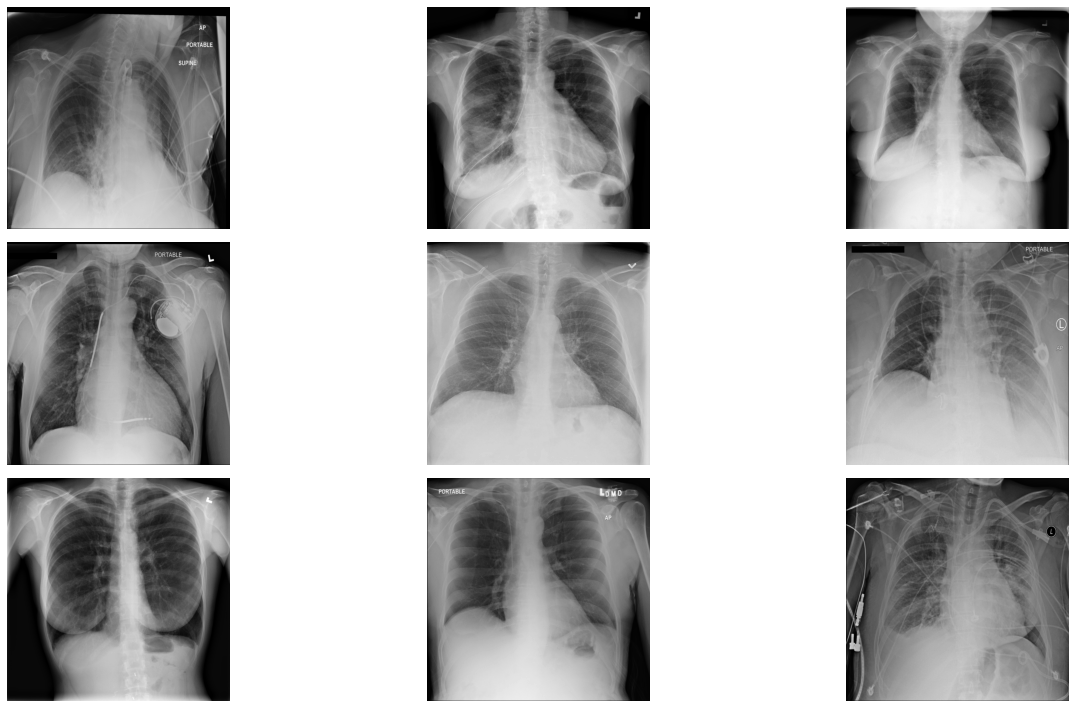

In [0]:
# Extract numpy values from Image column in data frame
images = train_df['Image Index'].values

# Extract 9 random images from it
random_images = [np.random.choice(images) for i in range(9)]

# Location of the image dir
img_dir = '/content/drive/My Drive/ML_data/cxr data'

print('Display Random Images')

# Adjust the size of your images
plt.figure(figsize=(20,10))

# Iterate and plot random images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()    

In [0]:
train_df.rename(columns = {'Image Index': 'Image'}, inplace = True); train_df.columns

Index(['Image', 'Fibrosis', 'Atelectasis', 'Pleural_Thickening', 'Hernia',
       'Cardiomegaly', 'Infiltration', 'Mass', 'Nodule', 'Pneumothorax',
       'Edema', 'Pneumonia', 'Consolidation', 'Emphysema', 'Effusion', 'AbN'],
      dtype='object')

### Investigate a single image
Run the cell below to look at the first image in the dataset and print out some details of the image contents.

The dimensions of the image are 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 0.8196 and the minimum is 0.0000
The mean value of the pixels is 0.4159 and the standard deviation is 0.2650


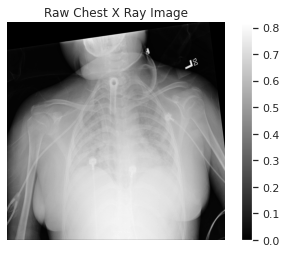

In [0]:
# Get the first image that was listed in the train_df dataframe
sample_img = train_df.Image.iloc[0]
raw_image = plt.imread(os.path.join(img_dir, sample_img))
plt.imshow(raw_image, cmap='gray')
plt.colorbar()
plt.axis('off') # added by me
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height, one single color channel")
print(f"The maximum pixel value is {raw_image.max():.4f} and the minimum is {raw_image.min():.4f}")
print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")

### Investigate pixel value distribution
Run the cell below to plot up the distribution of pixel values in the image shown above. 

Text(0, 0.5, '# Pixels in Image')

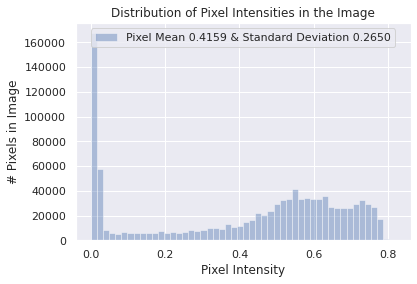

In [0]:
# Plot a histogram of the distribution of the pixels
sns.distplot(raw_image.ravel(), 
             label=f'Pixel Mean {np.mean(raw_image):.4f} & Standard Deviation {np.std(raw_image):.4f}', kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

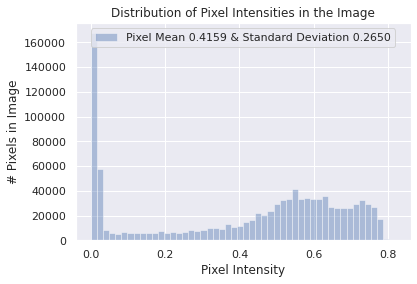

In [0]:
# Plot a histogram of the distribution of the pixels
sns.distplot(raw_image.ravel(), label=f'Pixel Mean {np.mean(raw_image):.4f} & Standard Deviation {np.std(raw_image):.4f}', kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')
plt.show()

<a name="image-processing"></a>

# Image Preprocessing in Keras

Before training, you'll first modify your images to be better suited for training a convolutional neural network. For this task you'll use the Keras [ImageDataGenerator](https://keras.io/preprocessing/image/) function to perform data preprocessing and data augmentation.

Run the next two cells to import this function and create an image generator for preprocessing.

In [0]:
# Import data generator from keras
from keras.preprocessing.image import ImageDataGenerator

In [0]:
# Normalize images
image_generator = ImageDataGenerator(
    samplewise_center=True, #Set each sample mean to 0.
    samplewise_std_normalization= True # Divide each input by its standard deviation
)

### Standardization

The `image_generator` you created above will act to adjust your image data such that the new mean of the data will be zero, and the standard deviation of the data will be 1.  

In other words, the generator will replace each pixel value in the image with a new value calculated by subtracting the mean and dividing by the standard deviation.

$$\frac{x_i - \mu}{\sigma}$$

Run the next cell to pre-process your data using the `image_generator`. In this step you will also be reducing the image size down to 320x320 pixels.

In [0]:
# Flow from directory with specified batch size and target image size
generator = image_generator.flow_from_dataframe(
        dataframe=train_df,
        directory='/content/drive/My Drive/ML_data/cxr data',
        x_col="Image", # features
        y_col= ['Mass'], # labels
        class_mode="raw", # 'Mass' column should be in train_df
        batch_size= 1, # images per batch
        shuffle=False, # shuffle the rows or not
        target_size=(320,320) # width and height of output image
)

Found 1062 validated image filenames.


In [0]:
generator

In [0]:
sample = next(iter(generator))  #this is a single image

In [0]:
sample[0].mean(), sample[0].std()  #mean nearly 0, std nearly 1

(1.10467276e-07, 1.0)

Run the next cell to plot up an example of a pre-processed image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 320 pixels width and 320 pixels height
The maximum pixel value is 1.5221 and the minimum is -1.5697
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


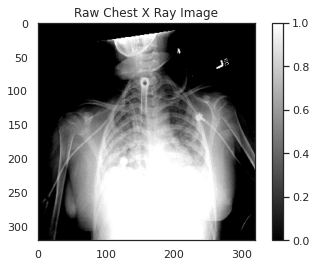

In [0]:
# Plot a processed image
sns.set_style("white")
generated_image, label = generator.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

Run the cell below to see a comparison of the distribution of pixel values in the new pre-processed image versus the raw image. 

Text(0, 0.5, '# Pixel')

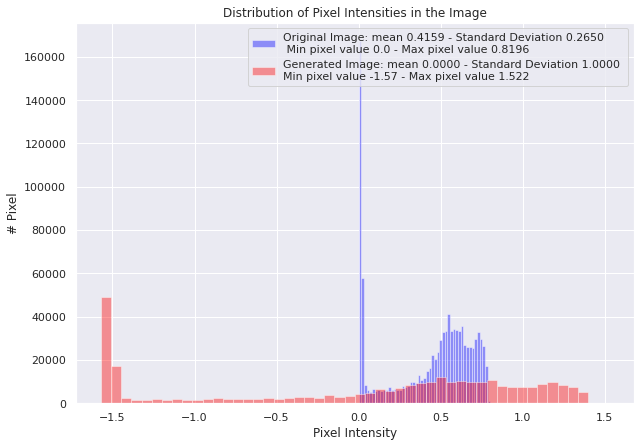

In [0]:
# Include a histogram of the distribution of the pixels
sns.set()
plt.figure(figsize=(10, 7))

# Plot histogram for original iamge
sns.distplot(raw_image.ravel(), 
             label=f'Original Image: mean {np.mean(raw_image):.4f} - Standard Deviation {np.std(raw_image):.4f} \n '
             f'Min pixel value {np.min(raw_image):.4} - Max pixel value {np.max(raw_image):.4}',
             color='blue', 
             kde=False)

# Plot histogram for generated image
sns.distplot(generated_image[0].ravel(), 
             label=f'Generated Image: mean {np.mean(generated_image[0]):.4f} - Standard Deviation {np.std(generated_image[0]):.4f} \n'
             f'Min pixel value {np.min(generated_image[0]):.4} - Max pixel value {np.max(generated_image[0]):.4}', 
             color='red', 
             kde=False)

# Place legends
plt.legend()
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixel')

#### That's it for this exercise, you should now be a bit more familiar with the dataset you'll be using in this week's assignment!